In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

### Solución para la posición y velocidad de un resorte en función del tiempo ###

$ u(t) $

$ \dfrac{du}{dt} = F(u,t) $

$ t_{k+1} = t_k + \Delta t $

$ k_1 = F(u_k, t_k) $

$ k_2 = F(u_k + \frac{\Delta t}{2}k_1, t_k + \frac{\Delta t}{2}) $

$ k_3 = F(u_k + \frac{\Delta t}{2}k_2, t_k + \frac{\Delta t}{2}) $

$ k_4 = F(u_k + \Delta t k_3, t + \Delta t) $

$ u_{k+1} = u_k + (k_1 + 2k_2 + 2k_3 + k_4) \frac{\Delta t}{6} $

In [25]:
m = 1 # masa
c = 0.1 # constante de amortiguamiento
k = 1 # constante del resorte

# condiciones iniciales
t = 0
x_i = 2
v_i = 0
u = np.array([x_i, v_i])

$ m \dfrac{d^2 x}{dt^2} + c \dfrac{dx}{dt} + kx = 0 $

$ x(t) = \begin{bmatrix} x(t) \\ \frac{dx}{dt}(t) \end{bmatrix} $

$ u(t) = \begin{bmatrix} u_0 \\ u_1 \end{bmatrix} = \begin{bmatrix} x(t) \\ v(t) \end{bmatrix} $

$ \dfrac{d^2x}{dt^2} = -\dfrac{c}{m} \dfrac{dx}{dt} - \dfrac{k}{m} x $

$ f(x,t) = -\dfrac{c}{m} \dfrac{dx}{dt} - \dfrac{k}{m} x $

$ \dfrac{du}{dt} = F(u,t) = \begin{bmatrix} u_1 \\ -\frac{c}{m} u_1 - \frac{k}{m} u_0 \end{bmatrix} $

$ u(0) = \begin{bmatrix} x_i \\ v_i \end{bmatrix} $

In [26]:
# campo de direcciones
def F(u,t):
    return np.array([u[1], -c*u[1]/m-k*u[0]/m])

In [27]:
# solución
t_sol = [t]
x_sol = [u[0]]
v_sol = [u[1]]
dt = 0.1
t_fin = 100

In [29]:
while t<t_fin:
    k1 = F(u,t)
    k2 = F(u+dt*k1/2, t+dt/2)
    k3 = F(u+dt*k2/2, t+dt/2)
    k4 = F(u+dt*k3, t+dt)
    u = u + (k1+2 * k2+2 * k3+k4)*dt/6
    t = t+dt
    x_sol.append(u[0])
    v_sol.append(u[1])
    t_sol.append(t)

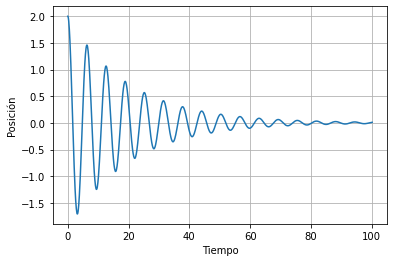

In [33]:
plt.plot(t_sol, x_sol)
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid()

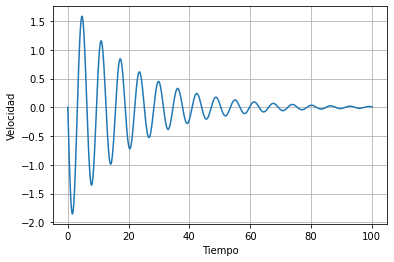

In [34]:
plt.plot(t_sol, v_sol)
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.grid()

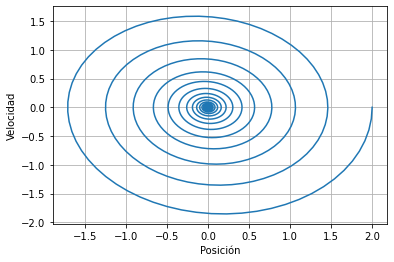

In [35]:
plt.plot(x_sol, v_sol)
plt.xlabel('Posición')
plt.ylabel('Velocidad')
plt.grid()

C:\Users\galle\AppData\Local\Temp\ipykernel_29676\2515697955.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


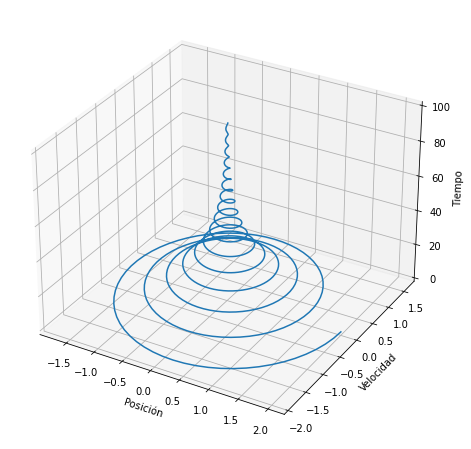

In [43]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.plot(x_sol, v_sol, t_sol)
ax.set_xlabel('Posición')
ax.set_ylabel('Velocidad')
ax.set_zlabel('Tiempo')
plt.show()